In [2]:
# Can get realitve import to work
#from .. import project_functions # This is called a relative import
#df = project_functions.load_and_process(url_or_path_to_csv_file)
#df



import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def load_and_process(data):
    df = pd.read_csv(data)
    blueTeam = (
        df.query('blueWins == 1').assign(
            KDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths'],
            losingTeamKDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths']
            ).rename(columns={"blueWardsPlaced":"wardsPlaced","blueWardsDestroyed":"wardsDestroyed","redWardsPlaced":"losingTeamWardsPlaced","redWardsDestroyed":"losingTeamWardsDestroyed",
                     "blueKills":"kills", "blueDeaths":"deaths","blueKDA":"KDA", "blueDragons":"dragonsTaken",
                     "blueAssits":"assits","blueEliteMonsters":"eliteMonsters", "blueHeralds":"heraldsTaken","blueTower":"towersTaken","blueTotalGold":"totalGold","blueAvgLevel":"avgLevel","blueTotalMinionsKilled":"totalMinionsKilled",
                     "blueGoldDiff":"goldDiff","blueCSPerMin":"csPerMin","redTowersDestoryed":"losingTeamTowersDestoried","blueTowersDestoried":'towerDestoried',
                      "blueAssits":"assists","blueExperienceDiff":"experienceDiff","redGoldPerMin":"losingTeamGoldPerMin","blueTowersDestroyed":"towersLost"
                    ,"blueTotalExperience":"totalExperience","blueFirstBlood":"firstBlood","redFirstBlood":"losingTeamFirstBlood","blueAssists":"assists","redAssists":"losingTeamAssits","blueGoldPerMin":"goldPerMin",
                    "blueTotalJungleMinionsKilled":"totalJungleMinionsKilled", "redTotalJungleMinionsKilled":"losingTeamTotalJungleMinionsKilled","redKills":"losingteamKills", "redDeaths":"losingTeamDeaths",
                    "redEliteMonsters":"losingTeamEliteMonsters","redDragons":"losingTeamDragons","redHeralds":"losingTeamHeralds","redTowersDestroyed":"losingTeamTowersDestroyed","redTeamGold":"losingTeamGold",
                    "redAvgLevel":"losingTeamAvgLevel","redTotalExperience":"losingTeamTotalExperience","redTotalMinionsKilled":"losingTeamTotalMinionsKilled","redTotalGold":"losingTeamTotalGold",
                    "redGoldDiff":"losingTeamGoldDiff","redCSPerMin":"losingTeamCSPerMin","redExperienceDiff":"losingTeamExperienceDiff" }).reset_index(drop=True, inplace=True)
        
    )
    redTeam =(
         df.query('blueWins == 0').assign(
            KDA = lambda x: x['redKills'] + x['redAssists']/x['redDeaths'],
            losingTeamKDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths']
         ).rename(columns={"redWardsPlaced":"wardsPlaced","redWardsDestroyed":"wardsDestroyed","blueWardsPlaced":"losingTeamWardsPlaced","blueWardsDestroyed":"losingTeamWardsDestroyed","redKills":"kills", "redDeaths":"deaths", "redDragons":"dragonsTaken",
                 "redAssits":"assists","redEliteMonsters":"eliteMonsters", "redHeralds":"heraldsTaken","redTower":"towersTaken","redTotalGold":"totalGold","redAvgLevel":"avgLevel","redTotalMinionsKilled":"totalMinionsKilled",
                  "redGoldDiff":"goldDiff","redCSPerMin":"csPerMin","redGoldPerMin":"goldPerMin","blueTowersDestoried":'losingTeamTowersDestoried',"redTowersDestoryed":'towersLost',"redExperienceDiff":"experienceDiff","blueExperienceDiff":"losingTeamExperienceDiff" ,
                 "blueGoldPerMin":"losingTeamGoldPerMin","redTowersTaken":"losingTeanTowersTaken","redTotalExperience":"totalExperience",
                  "redAssists":"assists","blueAssists":"losingTeamAssits","redTowersDestroyed":"towersLost","redTotalJungleMinionsKilled":"totalJungleMinionsKilled", "blueTotalJungleMinionsKilled":"losingTeamTotalJungleMinionsKilled",
                  "blueKills":"losingteamKills", "blueDeaths":"losingTeamDeaths",
                   "blueEliteMonsters":"losingTeamEliteMonsters","blueDragons":"losingTeamDragons","blueHeralds":"losingTeamHeralds","blueTowersDestroyed":"losingTeamTowersDestroyed","blueTeamGold":"losingTeamGold"
                   ,"blueAvgLevel":"losingTeamAvgLevel","blueTotalExperience":"losingTeamTotalExperience","blueTotalMinionsKilled":"losingTeamTotalMinionsKilled",
                   "blueGoldDiff":"losingTeamGoldDiff","blueCSPerMin":"losingTeamCSPerMin","blueTotalGold":"losingTeamTotalGold","redFirstBlood":"firstBlood","blueFirstBlood":"losingTeamFirstBlood"}).reset_index(drop=True)
    )
    frames = [blueTeam,redTeam]
    df1 = pd.concat(frames).reset_index(drop=True).sort_values(by='gameId', ascending =True)
    return df1

df = load_and_process("../../data/raw/data.csv")

In [ ]:
#Kills seem really imprtant based on eda

In [5]:
#trying quantile
#
#g = df.groupby('goldDiff')
#i = g['goldDiff'].quantile([0.05, 0.25,0.5,0.9]).unstack()
#j = g['goldDiff'].agg(['min','max'])

#pd.concat([i, j], 1)

#i.T.plot(subplots=True)
#plt.show()

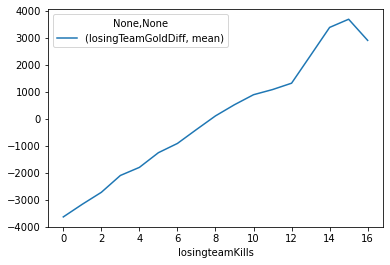

In [16]:
#wards average gold diff
df1 = df.groupby('losingteamKills').agg({'losingTeamGoldDiff': ['mean']}).plot()

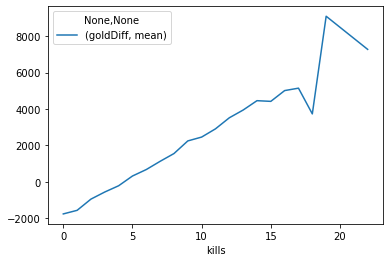

In [15]:
df1 = df.groupby('kills').agg({'goldDiff': ['mean']}).plot()

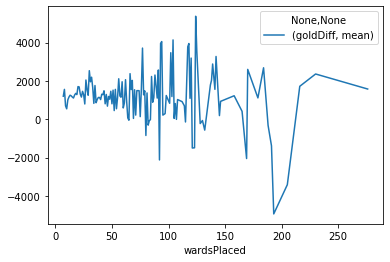

In [19]:
#wardData = data[['teamWon', 'blueWardsPlaced', 'redWardsPlaced']]
wardData = df.groupby('wardsPlaced').agg({'goldDiff':['mean']}).plot()